In [1]:
import pandas as pd
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

c:\Users\colig\anaconda3\envs\LAB1\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2.1.4


In [2]:
df = pd.read_csv("https://autogluon.s3.amazonaws.com/datasets/timeseries/m4_hourly_subset/train.csv")
df.head()

# Dimensions of the data
print(df.shape)

(148060, 3)


In [3]:
train_data = TimeSeriesDataFrame.from_data_frame(
    df,
    id_column="item_id",
    timestamp_column="timestamp"
)
train_data.head()

target
item_id timestamp                  
H1      1750-01-01 00:00:00   605.0
        1750-01-01 01:00:00   586.0
        1750-01-01 02:00:00   586.0
        1750-01-01 03:00:00   559.0
        1750-01-01 04:00:00   511.0

In [5]:
predictor = TimeSeriesPredictor(
    prediction_length=48,
    path="C:\\Develop\\autogluon-m4-hourly",
    target="target",
    eval_metric="MASE",
)

In [6]:
predictor = TimeSeriesPredictor(
    prediction_length=48,
    path="autogluon-m4-hourly",
    target="target",
    eval_metric="MASE",
)

predictor.fit(
    train_data,
    presets="medium_quality",
    time_limit=1200,
)

	Trained 10 models while tuning DeepAR.
	-1.2996       = Validation score (-MASE)
	3213.23 s     = Total tuning time
Fitting simple weighted ensemble.
	Ensemble weights: {'DeepAR\\28d0ddf1': 0.2, 'DeepAR\\a83a37a1': 0.21, 'DeepAR\\cbbb1a54': 0.38, 'DeepAR\\ebe30093': 0.21}
	-1.2346       = Validation score (-MASE)
	5.33    s     = Training runtime
	158.07  s     = Validation (prediction) runtime
Training complete. Models trained: ['DeepAR\\28d0ddf1', 'DeepAR\\d4cc766c', 'DeepAR\\abf4716d', 'DeepAR\\83e28756', 'DeepAR\\ebe30093', 'DeepAR\\cbbb1a54', 'DeepAR\\a26f7a72', 'DeepAR\\659bb612', 'DeepAR\\a83a37a1', 'DeepAR\\8d7a1552', 'WeightedEnsemble']
Total runtime: 3228.27 s
Best model: WeightedEnsemble
Best model score: -1.2346


In [7]:
# Make prediction on training data
predictions = predictor.predict(train_data)
predictions.head()


Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean         0.1         0.2         0.3  \
item_id timestamp                                                             
H1      1750-01-30 04:00:00  620.132623  605.600615  610.549963  613.728499   
        1750-01-30 05:00:00  559.346924  538.939495  546.395825  551.646370   
        1750-01-30 06:00:00  518.546747  496.085365  503.643218  509.410655   
        1750-01-30 07:00:00  489.302808  465.884265  475.114792  480.644220   
        1750-01-30 08:00:00  470.084916  446.933097  455.159070  460.832655   

                                    0.4         0.5         0.6         0.7  \
item_id timestamp                                                             
H1      1750-01-30 04:00:00  617.556170  620.132623  623.495465  625.863303   
        1750-01-30 05:00:00  555.191275  559.346924  563.399455  567.310355   
        1750-01-30 06:00:00  514.863457  518.546747  523.536048  527.773710   
        1750-01-30 07:00:00  485.097694  489.302808  494.400948  499.004430   
        1750-01-30 08:00:00  465.193772  470.084916  474.622500  480.318540   

                                    0.8         0.9  
item_id timestamp                                    
H1      1750-01-30 04:00:00  629.531712  634.675657  
        1750-01-30 05:00:00  571.303256  578.640535  
        1750-01-30 06:00:00  532.682116  539.777017  
        1750-01-30 07:00:00  504.115023  513.963431  
        1750-01-30 08:00:00  486.318930  495.438589

In [8]:
predictions.shape

(9600, 10)

Loaded data from: https://autogluon.s3.amazonaws.com/datasets/timeseries/m4_hourly_subset/test.csv | Columns = 3 / 3 | Rows = 157660 -> 157660


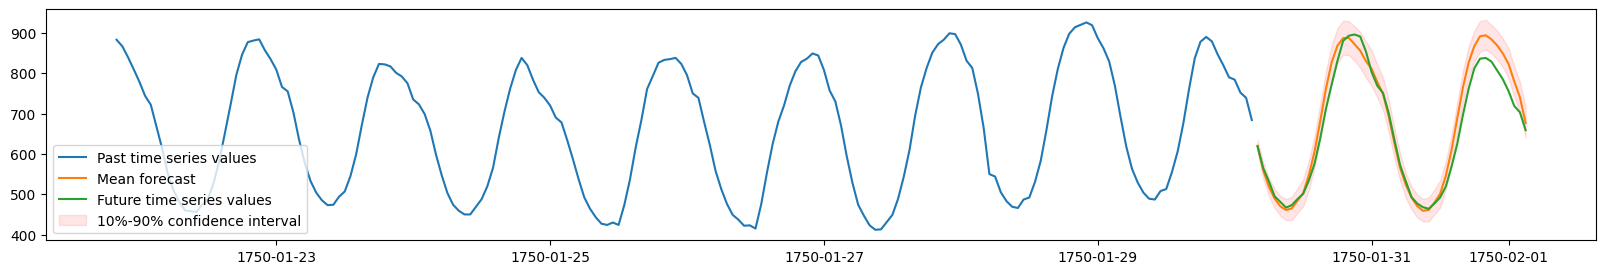

In [9]:
import matplotlib.pyplot as plt

# TimeSeriesDataFrame can also be loaded directly from a file
test_data = TimeSeriesDataFrame.from_path("https://autogluon.s3.amazonaws.com/datasets/timeseries/m4_hourly_subset/test.csv")

plt.figure(figsize=(20, 3))

item_id = "H1"
y_past = train_data.loc[item_id]["target"]
y_pred = predictions.loc[item_id]
y_test = test_data.loc[item_id]["target"][-48:]

plt.plot(y_past[-200:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean forecast")
plt.plot(y_test, label="Future time series values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend();

In [10]:
# The test score is computed using the last
# prediction_length=48 timesteps of each time series in test_data
predictor.leaderboard(test_data)

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,WeightedEnsemble,-1.329614,-1.234582,69.634992,158.065083,5.330928,11
1,DeepAR\cbbb1a54,-1.353317,-1.299553,15.939736,42.966229,2035.128057,6
2,DeepAR\ebe30093,-1.442280,-1.343552,19.956051,47.988957,2185.465757,5
3,DeepAR\abf4716d,-1.576152,-1.435951,16.156797,50.183096,1869.095036,3
4,DeepAR\a26f7a72,-1.630986,-1.534326,20.356109,43.192929,2742.259160,7
5,DeepAR\83e28756,-1.636171,-1.480402,18.088672,43.716323,1669.743970,4
6,DeepAR\28d0ddf1,-1.639226,-1.527859,12.469590,34.100230,1113.841586,1
7,DeepAR\a83a37a1,-1.746835,-1.418090,21.249650,33.009665,1937.661299,9
8,DeepAR\d4cc766c,-1.972536,-1.863639,15.999250,49.016478,1978.931203,2
9,DeepAR\8d7a1552,-2.027426,-1.746670,17.300438,21.604779,1483.780118,10


In [ ]:
# Another AutoGluon example
df = pd.read_csv("https://autogluon.s3.amazonaws.com/datasets/timeseries/m4_daily_subset/train.csv")
df.head()

,item_id,timestamp,target
0,D1737,1995-05-23,1900.0
1,D1737,1995-05-24,1877.0
2,D1737,1995-05-25,1873.0
3,D1737,1995-05-26,1859.0
4,D1737,1995-05-27,1876.0


In [ ]:
static_features_df = pd.read_csv("https://autogluon.s3.amazonaws.com/datasets/timeseries/m4_daily_subset/metadata.csv")
static_features_df.head()

,item_id,domain
0,D1737,Industry
1,D1843,Industry
2,D2246,Finance
3,D909,Micro
4,D1345,Micro


In [ ]:
train_data = TimeSeriesDataFrame.from_data_frame(
    df,
    id_column="item_id",
    timestamp_column="timestamp",
    static_features_df=static_features_df,
)
train_data.head()

target
item_id timestamp         
D1737   1995-05-23  1900.0
        1995-05-24  1877.0
        1995-05-25  1873.0
        1995-05-26  1859.0
        1995-05-27  1876.0

In [ ]:
train_data.static_features.head()

,domain
item_id,
D1737,Industry
D1843,Industry
D2246,Finance
D909,Micro
D1345,Micro


In [ ]:
train_data.static_features = static_features_df

In [ ]:
predictor = TimeSeriesPredictor(prediction_length=14).fit(train_data)

Beginning AutoGluon training...
AutoGluon will save models to 'AutogluonModels\ag-20240206_113949'
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.9.7
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          8
GPU Count:          0
Memory Avail:       4.38 GB / 15.78 GB (27.8%)
Disk Space Avail:   94.41 GB / 475.83 GB (19.8%)

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': 'default',
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 14,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 244460 rows, 100 time series. Median time series length is 3193 (min=115, max=4315). 

Provided dataset contains following columns:
	target:           

KeyboardInterrupt: 

In [ ]:
import numpy as np
train_data ["log_target"] = np.log(train_data["target"])

WEEKEND_INDICES = [5, 6]
timestamps = train_data.index.get_level_values("timestamp")
train_data["weekend"] = timestamps.weekday.isin(WEEKEND_INDICES).astype(float)

train_data.head()

target  log_target  weekend
item_id timestamp                              
D1737   1995-05-23  1900.0    7.549609      0.0
        1995-05-24  1877.0    7.537430      0.0
        1995-05-25  1873.0    7.535297      0.0
        1995-05-26  1859.0    7.527794      0.0
        1995-05-27  1876.0    7.536897      1.0

In [ ]:
predictor = TimeSeriesPredictor(
    prediction_length=14,
    target="target",
    known_covariates_names=["weekend"],
).fit(train_data)

Beginning AutoGluon training...
AutoGluon will save models to 'AutogluonModels\ag-20240122_103813'
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.9.12
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          8
GPU Count:          0
Memory Avail:       5.04 GB / 15.78 GB (31.9%)
Disk Space Avail:   98.59 GB / 475.83 GB (20.7%)

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': 'default',
 'known_covariates_names': ['weekend'],
 'num_val_windows': 1,
 'prediction_length': 14,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 244460 rows, 100 time series. Median time series length is 3193 (min=115, max=4315). 

Provided dataset contains following columns:
	target: 

In [ ]:
from autogluon.timeseries.utils.forecast import get_forecast_horizon_index_ts_dataframe

future_index = get_forecast_horizon_index_ts_dataframe(train_data, prediction_length=14)
future_timestamps = future_index.get_level_values("timestamp")
known_covariates = pd.DataFrame(index=future_index)
known_covariates["weekend"] = future_timestamps.weekday.isin(WEEKEND_INDICES).astype(float)

known_covariates.head()

weekend
item_id timestamp          
D1737   1997-05-28      0.0
        1997-05-29      0.0
        1997-05-30      0.0
        1997-05-31      1.0
        1997-06-01      1.0

In [ ]:
# Truncate the output of visual studio
pd.options.display.max_rows = 10
predictor.predict(train_data, known_covariates=known_covariates)

Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean          0.1          0.2          0.3  \
item_id timestamp                                                         
D1737   1997-05-28   1572.382802  1513.698481  1534.017049  1548.954057   
        1997-05-29   1572.710248  1493.447912  1520.747069  1540.335890   
        1997-05-30   1566.403188  1470.593541  1503.560337  1526.921390   
        1997-05-31   1565.915053  1457.552920  1493.951961  1521.255311   
        1997-06-01   1573.220234  1453.502400  1493.904195  1523.902510   
...                          ...          ...          ...          ...   
D2345   2013-07-18  10237.319433  9657.754649  9859.129548  9999.965112   
        2013-07-19  10230.135186  9618.135947  9831.504888  9980.911645   
        2013-07-20  10226.515181  9593.101578  9803.362813  9970.523507   
        2013-07-21  10206.160739  9552.970590  9776.016180  9931.647357   
        2013-07-22  10210.852844  9523.904990  9745.879899  9921.000057   

                             0.4           0.5           0.6           0.7  \
item_id timestamp                                                            
D1737   1997-05-28   1561.376856   1572.714774   1584.901632   1597.868980   
        1997-05-29   1557.024610   1572.037834   1588.331449   1604.669251   
        1997-05-30   1547.094213   1565.692844   1585.462745   1604.271726   
        1997-05-31   1542.641272   1563.031456   1585.695150   1607.737551   
        1997-06-01   1548.505119   1571.586073   1596.150520   1620.024233   
...                          ...           ...           ...           ...   
D2345   2013-07-18  10133.286972  10238.756697  10349.550811  10453.927259   
        2013-07-19  10109.397084  10233.461431  10354.825837  10468.750554   
        2013-07-20  10098.402993  10214.319525  10342.775039  10480.553203   
        2013-07-21  10080.097587  10193.424834  10317.276713  10462.977332   
        2013-07-22  10080.884535  10206.937102  10329.934635  10454.759894   

                             0.8           0.9  
item_id timestamp                               
D1737   1997-05-28   1611.412992   1632.804831  
        1997-05-29   1624.022335   1651.787835  
        1997-05-30   1627.901841   1660.928915  
        1997-05-31   1634.325995   1670.129573  
        1997-06-01   1649.633772   1691.596335  
...                          ...           ...  
D2345   2013-07-18  10591.341643  10804.278339  
        2013-07-19  10608.368913  10809.138840  
        2013-07-20  10633.663183  10834.070115  
        2013-07-21  10626.801725  10854.633028  
        2013-07-22  10640.161920  10861.868983  

[1400 rows x 10 columns]

In [ ]:
import holidays

timestamps = train_data.index.get_level_values("timestamp")
country_holidays = holidays.country_holidays(
    country="US",  # make sure to select the correct country/region!
    # Add + 1 year to make sure that holidays are initialized for the forecast horizon
    years=range(timestamps.min().year, timestamps.max().year + 1),
)
# Convert dict to pd.Series for pretty visualization
pd.Series(country_holidays).sort_index().head()

1978-01-01               New Year's Day
1978-01-02    New Year's Day (observed)
1978-02-20        Washington's Birthday
1978-05-29                 Memorial Day
1978-07-04             Independence Day
dtype: object

In [ ]:
import datetime

# must cover the full train time range + forecast horizon
custom_holidays = {
    datetime.date(1995, 1, 29): "Superbowl",
    datetime.date(1995, 11, 29): "Black Friday",
    datetime.date(1996, 1, 28): "Superbowl",
    datetime.date(1996, 11, 29): "Black Friday",
    # ... 
}

In [ ]:
def add_holiday_features(
    ts_df: TimeSeriesDataFrame, 
    country_holidays: dict,
    include_individual_holidays: bool = True,
    include_holiday_indicator: bool = True,
) -> TimeSeriesDataFrame:
    """Add holiday indicator columns to a TimeSeriesDataFrame."""
    ts_df = ts_df.copy()
    timestamps = ts_df.index.get_level_values("timestamp")
    country_holidays_df = pd.get_dummies(pd.Series(country_holidays)).astype(float)
    holidays_df = country_holidays_df.reindex(timestamps.date).fillna(0)
    if include_individual_holidays:
        ts_df[holidays_df.columns] = holidays_df.values
    if include_holiday_indicator:
        ts_df["Holiday"] = holidays_df.max(axis=1).values
    return ts_df

In [ ]:
add_holiday_features(train_data, country_holidays, include_individual_holidays=False).head()

target  log_target  weekend  Holiday
item_id timestamp                                       
D1737   1995-05-23  1900.0    7.549609      0.0      0.0
        1995-05-24  1877.0    7.537430      0.0      0.0
        1995-05-25  1873.0    7.535297      0.0      0.0
        1995-05-26  1859.0    7.527794      0.0      0.0
        1995-05-27  1876.0    7.536897      1.0      0.0

In [ ]:
train_data_with_holidays = add_holiday_features(train_data, country_holidays)
train_data_with_holidays.head()

target  log_target  weekend  Christmas Day  \
item_id timestamp                                                
D1737   1995-05-23  1900.0    7.549609      0.0            0.0   
        1995-05-24  1877.0    7.537430      0.0            0.0   
        1995-05-25  1873.0    7.535297      0.0            0.0   
        1995-05-26  1859.0    7.527794      0.0            0.0   
        1995-05-27  1876.0    7.536897      1.0            0.0   

                    Christmas Day (observed)  Columbus Day  Independence Day  \
item_id timestamp                                                              
D1737   1995-05-23                       0.0           0.0               0.0   
        1995-05-24                       0.0           0.0               0.0   
        1995-05-25                       0.0           0.0               0.0   
        1995-05-26                       0.0           0.0               0.0   
        1995-05-27                       0.0           0.0               0.0   

                    Independence Day (observed)  \
item_id timestamp                                 
D1737   1995-05-23                          0.0   
        1995-05-24                          0.0   
        1995-05-25                          0.0   
        1995-05-26                          0.0   
        1995-05-27                          0.0   

                    Juneteenth National Independence Day  \
item_id timestamp                                          
D1737   1995-05-23                                   0.0   
        1995-05-24                                   0.0   
        1995-05-25                                   0.0   
        1995-05-26                                   0.0   
        1995-05-27                                   0.0   

                    Juneteenth National Independence Day (observed)  \
item_id timestamp                                                     
D1737   1995-05-23                                              0.0   
        1995-05-24                                              0.0   
        1995-05-25                                              0.0   
        1995-05-26                                              0.0   
        1995-05-27                                              0.0   

                    Labor Day  Martin Luther King Jr. Day  Memorial Day  \
item_id timestamp                                                         
D1737   1995-05-23        0.0                         0.0           0.0   
        1995-05-24        0.0                         0.0           0.0   
        1995-05-25        0.0                         0.0           0.0   
        1995-05-26        0.0                         0.0           0.0   
        1995-05-27        0.0                         0.0           0.0   

                    New Year's Day  New Year's Day (observed)  Thanksgiving  \
item_id timestamp                                                             
D1737   1995-05-23             0.0                        0.0           0.0   
        1995-05-24             0.0                        0.0           0.0   
        1995-05-25             0.0                        0.0           0.0   
        1995-05-26             0.0                        0.0           0.0   
        1995-05-27             0.0                        0.0           0.0   

                    Veterans Day  Veterans Day (observed)  \
item_id timestamp                                           
D1737   1995-05-23           0.0                      0.0   
        1995-05-24           0.0                      0.0   
        1995-05-25           0.0                      0.0   
        1995-05-26           0.0                      0.0   
        1995-05-27           0.0                      0.0   

                    Washington's Birthday  Holiday  
item_id timestamp                                   
D1737   1995-05-23                    0.0      0.0  
        1995-05-24                    0.0      0.0  

In [ ]:
future_index = get_forecast_horizon_index_ts_dataframe(train_data, prediction_length=14)
future_timestamps = future_index.get_level_values("timestamp")
known_covariates = add_holiday_features(pd.DataFrame(index=future_index), country_holidays)
known_covariates.head()

Christmas Day  Christmas Day (observed)  Columbus Day  \
item_id timestamp                                                           
D1737   1997-05-28            0.0                       0.0           0.0   
        1997-05-29            0.0                       0.0           0.0   
        1997-05-30            0.0                       0.0           0.0   
        1997-05-31            0.0                       0.0           0.0   
        1997-06-01            0.0                       0.0           0.0   

                    Independence Day  Independence Day (observed)  \
item_id timestamp                                                   
D1737   1997-05-28               0.0                          0.0   
        1997-05-29               0.0                          0.0   
        1997-05-30               0.0                          0.0   
        1997-05-31               0.0                          0.0   
        1997-06-01               0.0                          0.0   

                    Juneteenth National Independence Day  \
item_id timestamp                                          
D1737   1997-05-28                                   0.0   
        1997-05-29                                   0.0   
        1997-05-30                                   0.0   
        1997-05-31                                   0.0   
        1997-06-01                                   0.0   

                    Juneteenth National Independence Day (observed)  \
item_id timestamp                                                     
D1737   1997-05-28                                              0.0   
        1997-05-29                                              0.0   
        1997-05-30                                              0.0   
        1997-05-31                                              0.0   
        1997-06-01                                              0.0   

                    Labor Day  Martin Luther King Jr. Day  Memorial Day  \
item_id timestamp                                                         
D1737   1997-05-28        0.0                         0.0           0.0   
        1997-05-29        0.0                         0.0           0.0   
        1997-05-30        0.0                         0.0           0.0   
        1997-05-31        0.0                         0.0           0.0   
        1997-06-01        0.0                         0.0           0.0   

                    New Year's Day  New Year's Day (observed)  Thanksgiving  \
item_id timestamp                                                             
D1737   1997-05-28             0.0                        0.0           0.0   
        1997-05-29             0.0                        0.0           0.0   
        1997-05-30             0.0                        0.0           0.0   
        1997-05-31             0.0                        0.0           0.0   
        1997-06-01             0.0                        0.0           0.0   

                    Veterans Day  Veterans Day (observed)  \
item_id timestamp                                           
D1737   1997-05-28           0.0                      0.0   
        1997-05-29           0.0                      0.0   
        1997-05-30           0.0                      0.0   
        1997-05-31           0.0                      0.0   
        1997-06-01           0.0                      0.0   

                    Washington's Birthday  Holiday  
item_id timestamp                                   
D1737   1997-05-28                    0.0      0.0  
        1997-05-29                    0.0      0.0  
        1997-05-30                    0.0      0.0  
        1997-05-31                    0.0      0.0  
        1997-06-01                    0.0      0.0

In [ ]:
# add column weekend to known_covariates
known_covariates["weekend"] = future_timestamps.weekday.isin(WEEKEND_INDICES).astype(float)


predictions = predictor.predict(train_data_with_holidays, known_covariates=known_covariates)

Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


In [ ]:
# Show me column name of known_covariates
known_covariates.columns


Index(['Christmas Day', 'Christmas Day (observed)', 'Columbus Day',
       'Independence Day', 'Independence Day (observed)',
       'Juneteenth National Independence Day',
       'Juneteenth National Independence Day (observed)', 'Labor Day',
       'Martin Luther King Jr. Day', 'Memorial Day', 'New Year's Day',
       'New Year's Day (observed)', 'Thanksgiving', 'Veterans Day',
       'Veterans Day (observed)', 'Washington's Birthday', 'Holiday',
       'weekend'],
      dtype='object')

In [ ]:
prediction_length = 48
data = TimeSeriesDataFrame.from_path("https://autogluon.s3.amazonaws.com/datasets/timeseries/m4_hourly_subset/train.csv")
train_data, test_data = data.train_test_split(prediction_length)

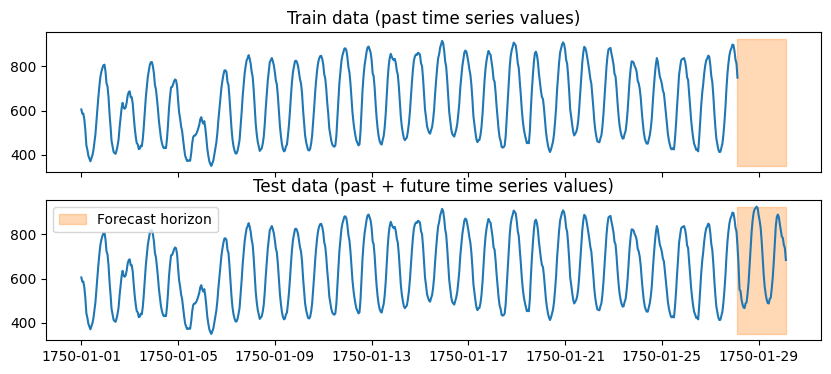

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

item_id = "H1"
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=[10, 4], sharex=True)
train_ts = train_data.loc[item_id]
test_ts = test_data.loc[item_id]
ax1.set_title("Train data (past time series values)")
ax1.plot(train_ts)
ax2.set_title("Test data (past + future time series values)")
ax2.plot(test_ts)
for ax in (ax1, ax2):
    ax.fill_between(np.array([train_ts.index[-1], test_ts.index[-1]]), test_ts.min(), test_ts.max(), color="C1", alpha=0.3, label="Forecast horizon")
plt.legend()
plt.show()